In [1]:
'hello world'
# github account creation it is very important

'hello world'

In [1]:
# ! pip install scikit-learn matplotlib pandas numpy seaborn

In [2]:
! pip freeze > requirements.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [1]:
import pandas as pds

file_path = '../datasets/heart.csv'

data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.shape

(918, 12)

In [9]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

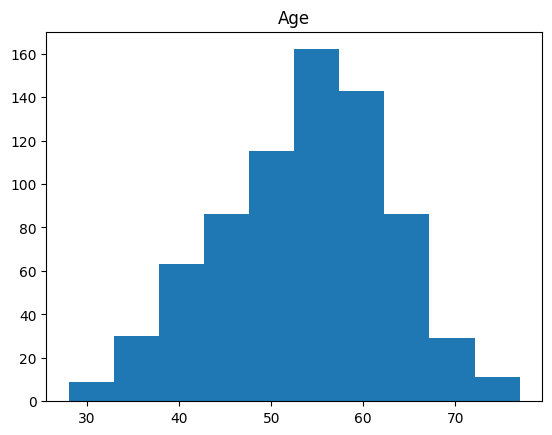

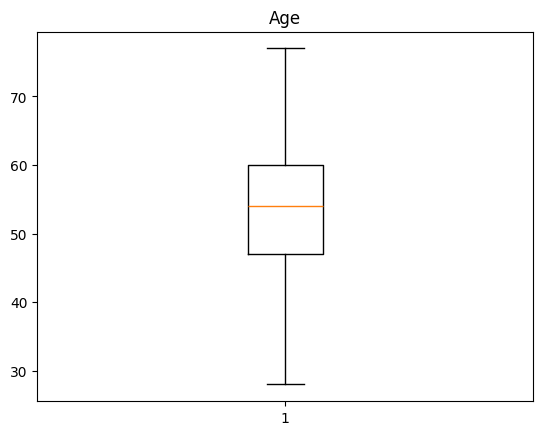

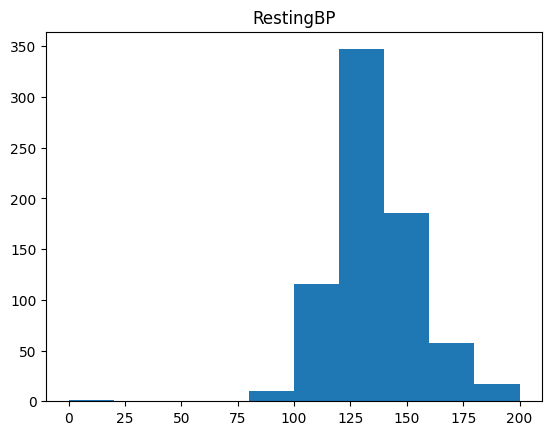

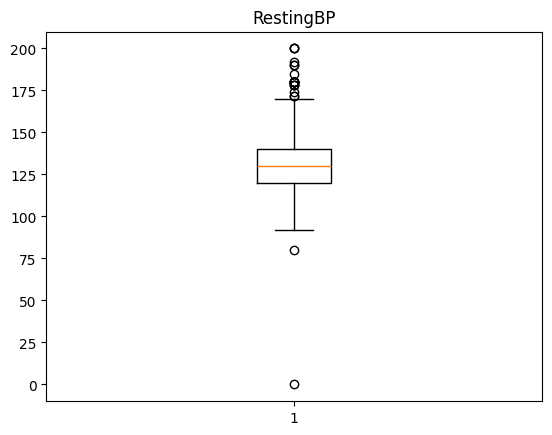

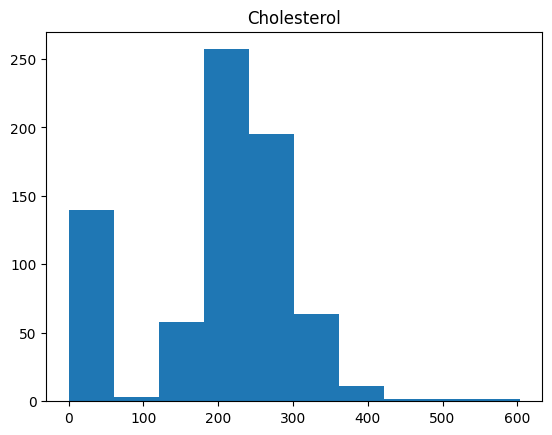

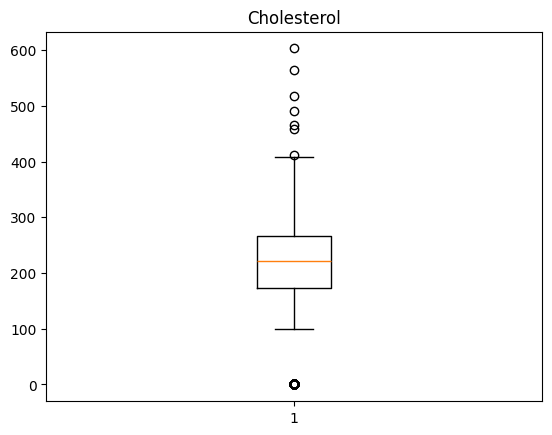

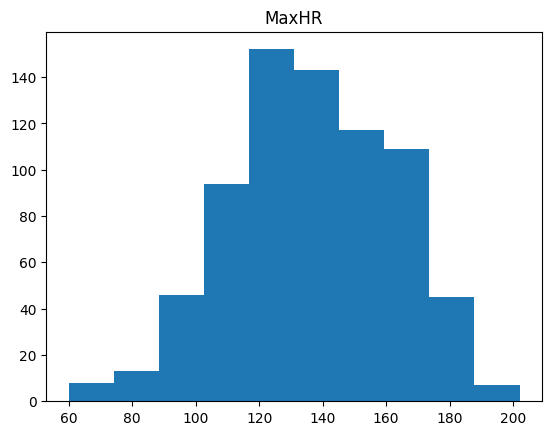

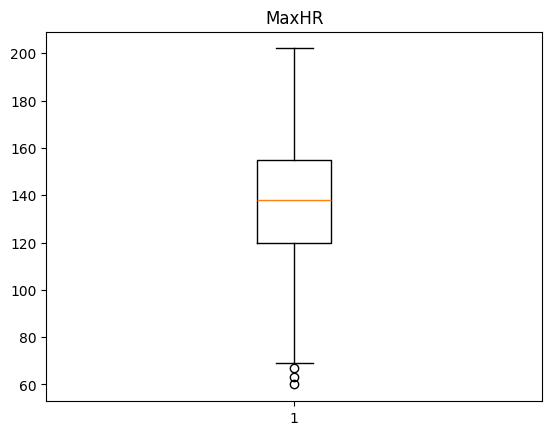

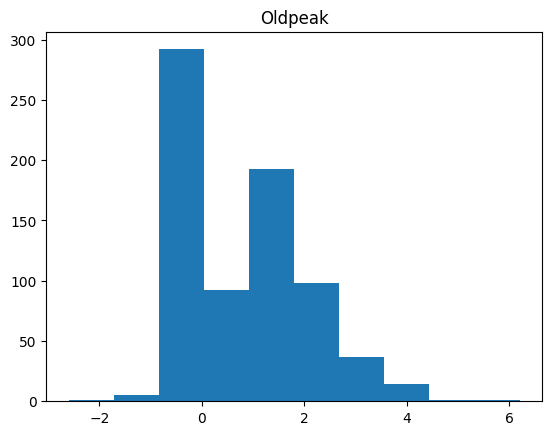

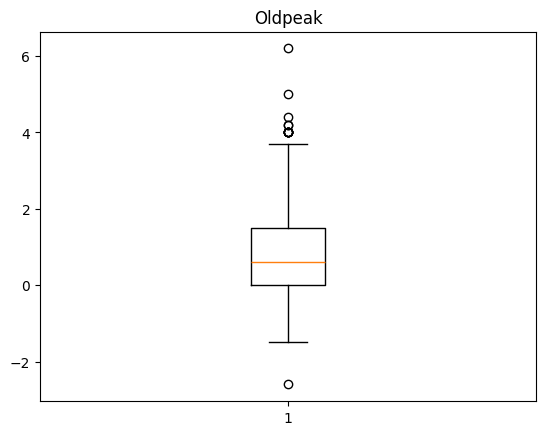

In [6]:
train_data_num = train [["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]]
for i in train_data_num.columns:
    plt.hist(train_data_num[i])
    plt.title(i)
    plt.show()
    plt.boxplot(train_data_num[i])
    plt.title(i)
    plt.show()

<Axes: >

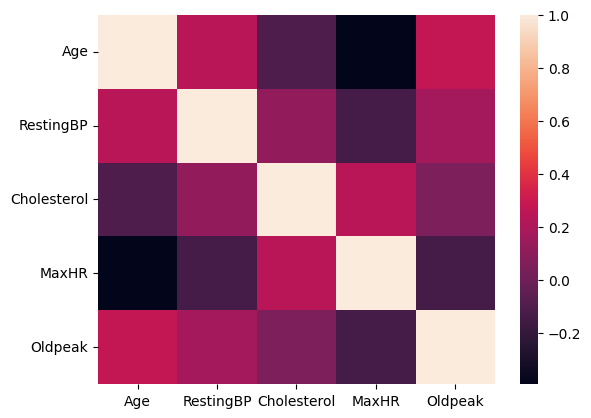

In [7]:
sns.heatmap(train_data_num.corr())


In [8]:
pd.pivot_table(train, index="HeartDisease", values=["Age","RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"])


,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingBP
HeartDisease,,,,,,
0,50.355623,226.37690,0.100304,148.130699,0.425532,130.082067
1,56.298765,174.94321,0.353086,127.728395,1.302469,134.303704


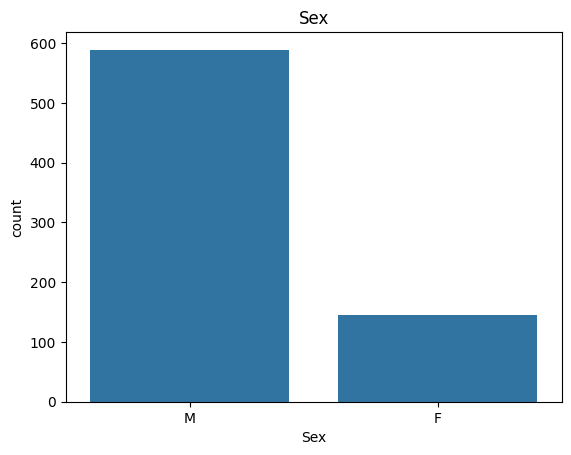

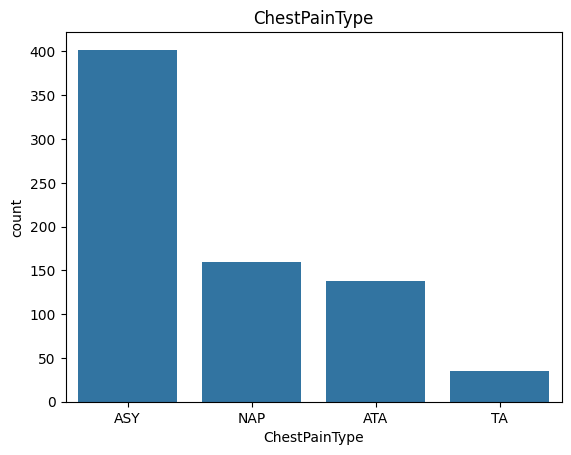

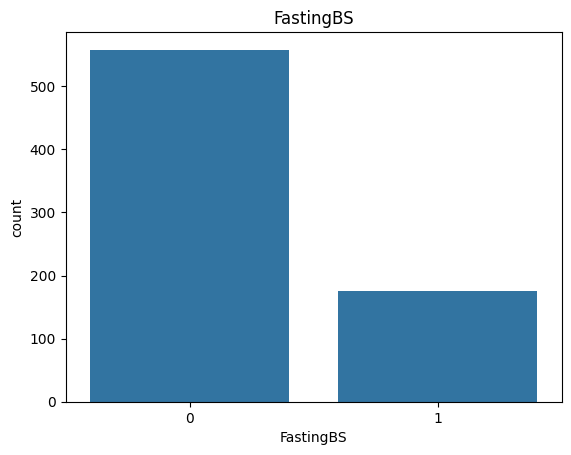

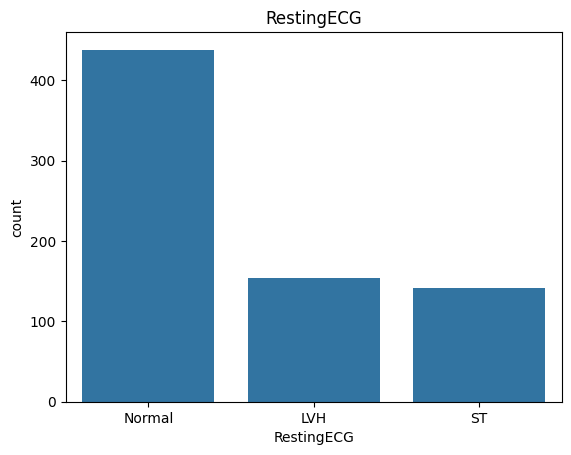

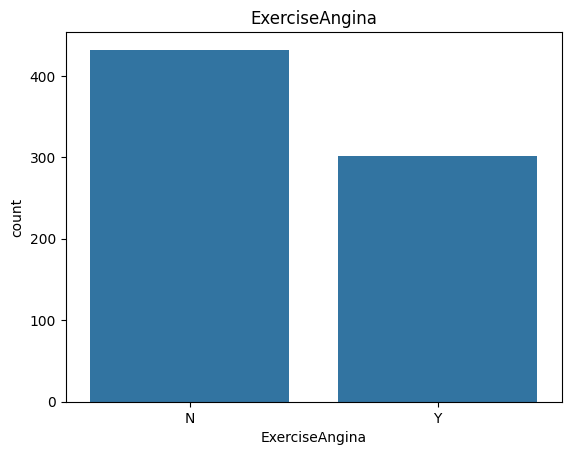

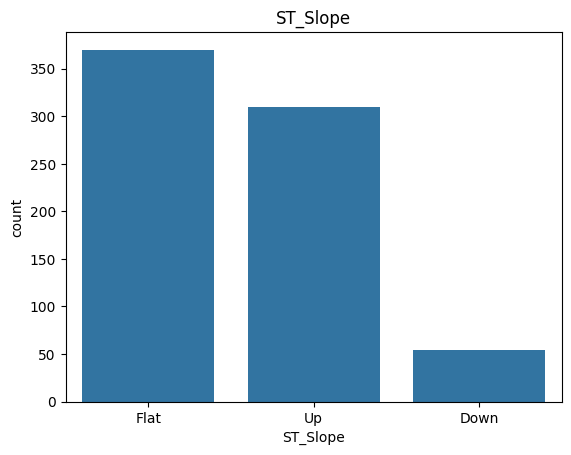

In [9]:
train_data_quali = train[['Sex','ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]

for info in train_data_quali.columns:
  sns.barplot(x=train_data_quali[info].value_counts().index, y=train_data_quali[info].value_counts()).set_title(info)
  plt.show()

In [10]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train.head(20)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
352,56,120,0,0,100,-1.0,1,False,True,True,...,False,False,False,False,True,False,True,True,False,False
903,56,130,221,0,163,0.0,0,False,True,False,...,False,False,True,False,False,True,False,False,False,True
241,54,200,198,0,142,2.0,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
647,37,120,215,0,170,0.0,0,True,False,False,...,True,False,False,True,False,True,False,False,False,True
259,55,122,320,0,155,0.0,0,True,False,False,...,False,False,False,True,False,True,False,False,False,True
391,70,115,0,0,92,0.0,1,False,True,True,...,False,False,False,False,True,False,True,False,True,False
745,63,108,269,0,169,1.8,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
126,34,130,161,0,190,0.0,0,True,False,False,...,False,False,False,True,False,True,False,False,False,True
648,59,170,326,0,140,3.4,1,False,True,True,...,False,False,True,False,False,False,True,True,False,False
484,65,134,0,0,112,1.1,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False


In [13]:
x_train = train.drop(columns = ["HeartDisease"])
y_train = train["HeartDisease"]

x_test = test.drop(columns = ["HeartDisease"])
y_test = test['HeartDisease']

y_train

352    1
903    0
241    1
647    0
259    0
      ..
536    1
309    1
293    1
308    1
860    1
Name: HeartDisease, Length: 734, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

model = LogisticRegression()
# cross validation 
model = model.fit(x_train, y_train)
predicted = model.predict(x_test)
results = confusion_matrix(y_test, predicted) 
results
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print(classification_report(y_test, predicted))

Confusion Matrix :
[[74  7]
 [20 83]]
Accuracy Score : 0.8532608695652174
Report : 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        81
           1       0.92      0.81      0.86       103

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



d:\Work\Job\RefonteInfiniti.com\Foundation Models\demos\batch2DS\backend\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
x_test.iloc[0]

Age                     60
RestingBP              100
Cholesterol            248
FastingBS                0
MaxHR                  125
Oldpeak                1.0
Sex_F                False
Sex_M                 True
ChestPainType_ASY     True
ChestPainType_ATA    False
ChestPainType_NAP    False
ChestPainType_TA     False
RestingECG_LVH       False
RestingECG_Normal     True
RestingECG_ST        False
ExerciseAngina_N      True
ExerciseAngina_Y     False
ST_Slope_Down        False
ST_Slope_Flat         True
ST_Slope_Up          False
Name: 18, dtype: object

In [25]:
def predict_disease(model, Age=25, RestingBP=140, Cholesterol=150, FastingBS=0, MaxHR=120, Oldpeak=0.5, HeartDisease=0, Sex_F=True, Sex_M=False, ChestPainType_ASY=False, ChestPainType_NAP=False, ChestPainType_TA=False, RestingECG_LVH=True, RestingECG_Normal=False, RestingECG_ST=False, ExerciseAngina_N=True, ExerciseAngina_Y=False, ST_Slope_Down=True, ST_Slope_Flat=True, ST_Slope_Up=False):
    x = np.array([ Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease, Sex_F, Sex_M, ChestPainType_ASY, ChestPainType_NAP, ChestPainType_TA, RestingECG_LVH, RestingECG_Normal, RestingECG_ST, ExerciseAngina_N, ExerciseAngina_Y, ST_Slope_Down, ST_Slope_Flat, ST_Slope_Up]).reshape(1, 20)
    print(model.predict(x))
    print(model.predict_proba(x))

In [26]:
predict_disease(model=model)

[1]
[[0.44352454 0.55647546]]


d:\Work\Job\RefonteInfiniti.com\Foundation Models\demos\batch2DS\backend\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Work\Job\RefonteInfiniti.com\Foundation Models\demos\batch2DS\backend\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
